In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("/content/virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [11]:
df.Runs.value_counts()

0      10
2       5
12      4
37      4
1       4
       ..
77*     1
26      1
43      1
64      1
55      1
Name: Runs, Length: 83, dtype: int64

In [9]:
df.Runs.dtype

dtype('O')

In [16]:
df.Runs=df.Runs.apply(lambda x:x.replace('*',''))

In [17]:
df.Runs=df.Runs.apply(lambda x:float(x))

In [18]:
## Your code here
df.Runs.quantile(0.5)-df.Runs.quantile(0.25)

22.25

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


Upper fence = Q 3 + 1.5 × IQR 

In [21]:
IQR=df.Runs.quantile(0.75)-df.Runs.quantile(0.25)
Upperfence=df.Runs.quantile(0.75)+1.5*IQR
Upperfence

186.5

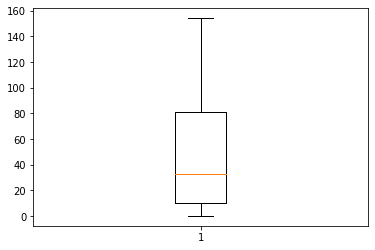

In [19]:
#Your code here
plt.boxplot(df.Runs)
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [22]:
## Your code here
df["Start Date"]= df["Start Date"].astype('datetime64')
df["year"]=pd.DatetimeIndex(df["Start Date"]).year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        130 non-null    float64       
 1   Mins        130 non-null    object        
 2   BF          130 non-null    int64         
 3   4s          130 non-null    int64         
 4   6s          130 non-null    int64         
 5   SR          130 non-null    object        
 6   Pos         130 non-null    int64         
 7   Dismissal   130 non-null    object        
 8   Inns        130 non-null    int64         
 9   Opposition  130 non-null    object        
 10  Ground      130 non-null    object        
 11  Start Date  130 non-null    datetime64[ns]
 12  year        130 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 14.2+ KB


In [23]:
df.year.value_counts()

2011    31
2013    22
2014    17
2010    16
2012    11
2015    10
2016    10
2008     5
2009     5
2017     3
Name: year, dtype: int64

In [25]:
pd.pivot_table(df, values='Runs',columns=['year'], aggfunc=np.mean)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Runs,31.8,45.6,45.375,42.0,40.363636,46.5,58.529412,30.4,73.9,61.666667


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [27]:
df.Mins.dtype

dtype('O')

In [32]:
df.Mins.value_counts

<bound method IndexOpsMixin.value_counts of 0       33
1       82
2       40
3       87
4       45
      ... 
127     64
128    152
129    147
130      6
131     81
Name: Mins, Length: 130, dtype: object>

there is a record with Mins='-',we have to remove it

In [35]:
#df=df[df.Mins!='-'](run this line instead of below code)
df=df[df.Mins!='']

In [36]:
df.Mins=df.Mins.apply(lambda x:float(x))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


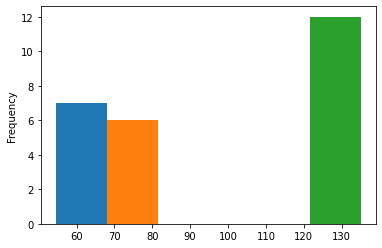

In [37]:
#Your code here
df["Mins"].plot.hist(bins=1,range=[54.6,68])
df["Mins"].plot.hist(bins=1,range=[68,81.4])
df["Mins"].plot.hist(bins=1,range=[121.6,135])